# Importing all the required Libraries

In [27]:
import pandas as pd
from scipy.stats import iqr
from scipy.stats import ttest_1samp,f_oneway,chi2_contingency
from scipy.stats import norm

# Reading a file from the Local Disk

In [28]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\life.csv")

In [29]:
x.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,6.0,8.16,65.0,584.259210,33736494.0,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,58.0,8.18,62.0,612.696514,327582.0,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,62.0,8.13,64.0,631.744976,31731688.0,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,67.0,8.52,67.0,669.959000,3696958.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,68.0,7.87,68.0,63.537231,2978599.0,0.454,9.5


# Checking Null Values

In [30]:
x.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
Income composition of resources    167
Schooling                          163
dtype: int64

# Imputing  the null values

In [32]:
for f in x.columns :
    if x[f].dtypes=="float64" :
        x[f].fillna(value=x[f].mean(),inplace=True)
    else :
        pass

# Rechecking The null values

In [33]:
x.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

# Standard Normalization

In [34]:
from scipy.stats import zscore

In [37]:
a=zscore(x)

In [38]:
b=pd.DataFrame(a,columns=x.columns)

In [39]:
b

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling
0,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-3.278638,0.925806,-0.732952,-0.525248,0.389975,-0.725401,-0.579931
1,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-1.051482,0.934140,-0.859877,-0.523083,-0.230936,-0.740050,-0.610570
2,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.880163,0.913306,-0.775260,-0.521632,0.352715,-0.769349,-0.641209
3,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,-0.666013,1.075815,-0.648335,-0.518723,-0.168315,-0.803531,-0.671847
4,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,-0.623183,0.804966,-0.606027,-0.564893,-0.181666,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-2.622015,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.666013,0.496616,-0.732952,-0.535137,0.000449,-1.076989,-0.855681
2934,-2.600976,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-3.235808,0.242435,-0.606027,-0.535214,-0.002221,-1.023274,-0.763764
2935,-2.569417,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.409034,0.246602,-0.479102,-0.565364,-0.234691,-0.979326,-0.610570
2936,-2.516818,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.280544,0.092426,-0.309869,-0.527964,-0.007196,-0.979326,-0.671847


# Performing Outlier Treatment

In [40]:
import seaborn as sns

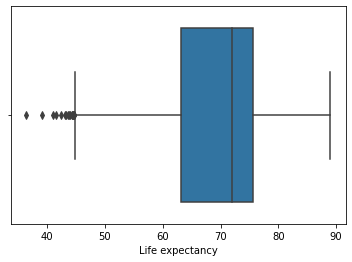

In [41]:
sns.boxplot(x["Life expectancy"])

In [42]:
lower=x["Life expectancy"].quantile(0.25)-(1.5*iqr(x["Life expectancy"]))

In [43]:
upper=x["Life expectancy"].quantile(0.75)+(1.5*iqr(x["Life expectancy"]))

In [44]:
x["Life expectancy"].clip(lower,upper,inplace=True)

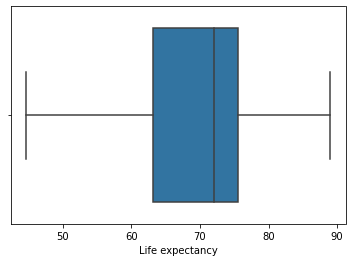

In [45]:
sns.boxplot(x["Life expectancy"])

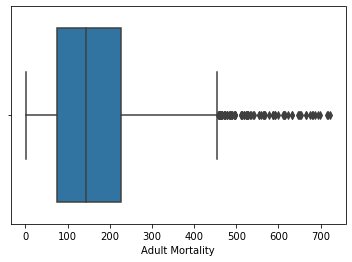

In [46]:
sns.boxplot(x["Adult Mortality"])

In [47]:
lower=x["Adult Mortality"].quantile(0.25)-(1.5*iqr(x["Adult Mortality"]))

In [48]:
upper=x["Adult Mortality"].quantile(0.75)+(1.5*iqr(x["Adult Mortality"]))

In [49]:
x['Adult Mortality'].clip(lower,upper,inplace=True)

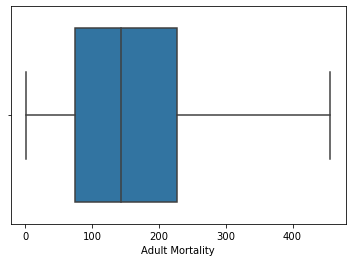

In [50]:
sns.boxplot(x["Adult Mortality"])

# Performing Transformations

In [54]:
import numpy as np

In [66]:
c=x["Life expectancy"]

In [67]:
l=pd.DataFrame(c)

In [68]:
l

,Life expectancy
0,8.062258
1,7.739509
2,7.739509
3,7.713624
4,7.694154
...,...
2933,6.678323
2934,6.678323
2935,6.693280
2936,6.730527


In [70]:
l["Life expectancy"]=np.log(l["Life expectancy"])

In [71]:
l["Life expectancy"]

0       2.087194
1       2.046338
2       2.046338
3       2.042988
4       2.040461
          ...   
2933    1.898867
2934    1.898867
2935    1.901104
2936    1.906654
2937    1.914321
Name: Life expectancy, Length: 2938, dtype: float64

In [72]:
l["Life expectancy"]=np.sqrt(l["Life expectancy"])

In [73]:
l["Life expectancy"]

0       1.444712
1       1.430503
2       1.430503
3       1.429331
4       1.428447
          ...   
2933    1.377994
2934    1.377994
2935    1.378805
2936    1.380816
2937    1.383590
Name: Life expectancy, Length: 2938, dtype: float64

In [74]:
l["Life expectancy"]=1/l["Life expectancy"]

In [75]:
l["Life expectancy"]

0       0.692179
1       0.699055
2       0.699055
3       0.699628
4       0.700061
          ...   
2933    0.725693
2934    0.725693
2935    0.725266
2936    0.724209
2937    0.722758
Name: Life expectancy, Length: 2938, dtype: float64

# Statistics

# To find a Quartile and Percentile of a given data

# To Find the percentile of  adults Mortality below 70 

In [81]:
norm.cdf(70,x["Adult Mortality"].mean(),x["Adult Mortality"].std())

0.21276691344287157

# To Find the  percentile of adults Mortality between 65 and 70

In [87]:
norm.cdf(70,x["Adult Mortality"].mean(),x['Adult Mortality'].std())-norm.cdf(65,x["Adult Mortality"].mean(),x["Adult Mortality"].std())

0.0123557641642138

# To find the  percentile of adults Mortality Above 70

In [88]:
1-norm.cdf(70,x["Adult Mortality"].mean(),x["Adult Mortality"].std())

0.7872330865571284

# To find the value at a given Percentile

In [89]:
norm.ppf(0.47,x["Adult Mortality"].mean(),x["Adult Mortality"].std())

153.3317016673574

In [90]:
norm.ppf(0.25,x["Adult Mortality"].mean(),x['Adult Mortality'].std())

84.13149092392702

# T test ( One Continous and One Discrete Variable)

In [117]:
from scipy.stats import ttest_ind

In [118]:
s1=x[x["Life expectancy"]>6] ["Alcohol"]
s2=x[x["Life expectancy"]>7] ["Alcohol"]

In [119]:
ttest_ind(s1,s2)

Ttest_indResult(statistic=-0.321531933984513, pvalue=0.7478189565566725)

# F test  (One Continous and One Discrete Variable)

In [121]:
s1=x[x["Polio"]>8] ["Alcohol"]
s2=x[x["Polio"]==8] ["Alcohol"]


In [122]:
f_oneway(s1,s2)

F_onewayResult(statistic=13.339738785726126, pvalue=0.0002644773024534814)

# Chi Square Test ( TwoCategorical  Variables)
# Here No  Categorical Variables Present  can't Perform Chi Square Test

# Correlation ( Two Continous Variables)

In [125]:
x.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,-0.690584,-0.195029,0.381112,0.368457,0.204600,0.462683,0.201995,0.477137,0.417585,-0.017342,0.686654,0.708034
Adult Mortality,-0.690584,1.000000,0.086195,-0.199036,-0.253165,-0.138778,-0.285867,-0.126845,-0.286619,-0.286132,-0.010035,-0.451604,-0.453832
infant deaths,-0.195029,0.086195,1.000000,-0.113812,-0.085612,-0.178783,-0.170674,-0.126564,-0.175156,-0.107109,0.548522,-0.143663,-0.191757
Alcohol,0.381112,-0.199036,-0.113812,1.000000,0.339634,0.075447,0.213744,0.294898,0.215242,0.318591,-0.030765,0.416099,0.497546
percentage expenditure,0.368457,-0.253165,-0.085612,0.339634,1.000000,0.011679,0.147203,0.173414,0.143570,0.888140,-0.024648,0.380374,0.388105
Hepatitis B,0.204600,-0.138778,-0.178783,0.075447,0.011679,1.000000,0.408519,0.050084,0.499958,0.062318,-0.109811,0.150992,0.171755
Polio,0.462683,-0.285867,-0.170674,0.213744,0.147203,0.408519,1.000000,0.130129,0.673553,0.193980,-0.034882,0.355398,0.385832
Total expenditure,0.201995,-0.126845,-0.126564,0.294898,0.173414,0.050084,0.130129,1.000000,0.145597,0.121467,-0.066698,0.149095,0.218310
Diphtheria,0.477137,-0.286619,-0.175156,0.215242,0.143570,0.499958,0.673553,0.145597,1.000000,0.182795,-0.025458,0.371729,0.389944
GDP,0.417585,-0.286132,-0.107109,0.318591,0.888140,0.062318,0.193980,0.121467,0.182795,1.000000,-0.025612,0.440317,0.429489


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

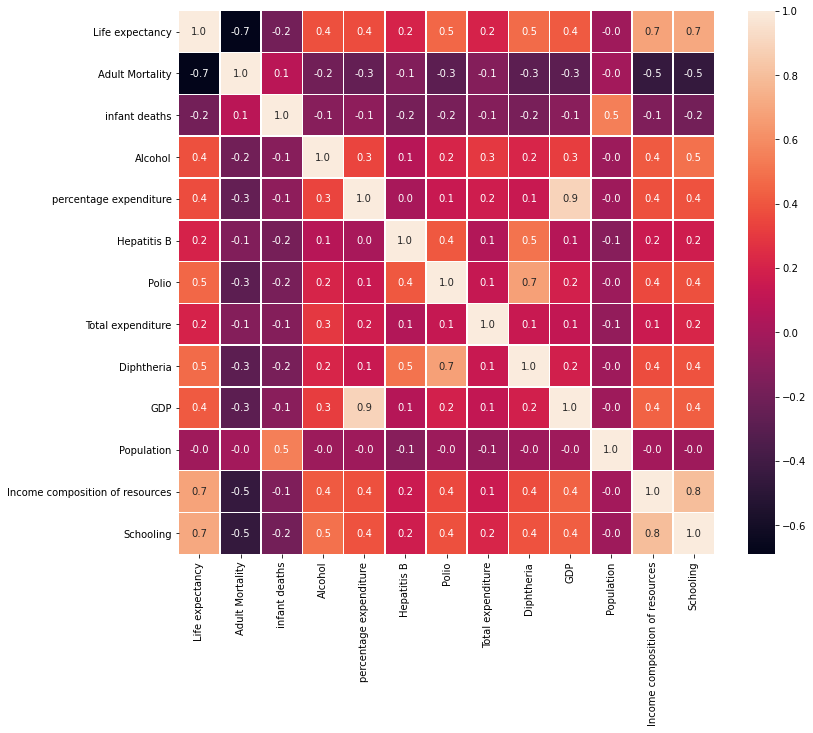

In [131]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(),annot=True,fmt=".1f",linewidths=0.6)

# Converting Continous to ordinal variable (also called as Binning)

In [168]:
x.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling,New
0,8.062258,263.0,62,0.01,71.279624,65,6.0,8.16,65.0,584.259210,33736494.0,0.479,10.1,0-500
1,7.739509,271.0,64,0.01,73.523582,62,58.0,8.18,62.0,612.696514,327582.0,0.476,10.0,0-500
2,7.739509,268.0,66,0.01,73.219243,64,62.0,8.13,64.0,631.744976,31731688.0,0.470,9.9,0-500
3,7.713624,272.0,69,0.01,78.184215,67,67.0,8.52,67.0,669.959000,3696958.0,0.463,9.8,0-500
4,7.694154,275.0,71,0.01,7.097109,68,68.0,7.87,68.0,63.537231,2978599.0,0.454,9.5,0-500


In [169]:
a=[]

In [170]:
for f in  range (len(x)) :
    if x["infant deaths"] [f]<=500 :
        a.append("0-500")
    elif x["infant deaths"][f]>500 and x["infant deaths"] [f]<=700 :
        a.append("500-700")
    elif x["infant deaths"] [f]>700 and x["infant deaths"] [f]<=1200 :
        a.append("700-1200")
    else :
        a.append("1300-1800")

In [171]:
x["New"]=a

In [172]:
x.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Population,Income composition of resources,Schooling,New
0,8.062258,263.0,62,0.01,71.279624,65,6.0,8.16,65.0,584.259210,33736494.0,0.479,10.1,0-500
1,7.739509,271.0,64,0.01,73.523582,62,58.0,8.18,62.0,612.696514,327582.0,0.476,10.0,0-500
2,7.739509,268.0,66,0.01,73.219243,64,62.0,8.13,64.0,631.744976,31731688.0,0.470,9.9,0-500
3,7.713624,272.0,69,0.01,78.184215,67,67.0,8.52,67.0,669.959000,3696958.0,0.463,9.8,0-500
4,7.694154,275.0,71,0.01,7.097109,68,68.0,7.87,68.0,63.537231,2978599.0,0.454,9.5,0-500
